In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# input/lapchart/year(2012,2013...)

path = './input/lapchart/'  #ディレクトリ一覧を取得したいディレクトリ

df = pd.DataFrame()

for year in os.listdir(path):  
    dir_path = path + year
    if not(os.path.isdir(dir_path)):
        continue
#    print('year=',year,",path=",dir_path)
    dir_path = dir_path + "/"
    for course in os.listdir(dir_path):
        file_path = dir_path + course
        if not(os.path.isfile(file_path)):
            continue
        course = course.replace('.txt','')
        
        f = open(file_path, 'r')
        line = f.readline()
        grid_chart = line.strip().split(' ') 
        line = f.readline()
        first_chart = line.strip().split(' ')
        del grid_chart[0]
        del first_chart[0]        
        f.close()
        
        for index, grid in enumerate(grid_chart):        
            if grid not in first_chart:
                continue
            key_value = {}
            key_value['course'] = course
            key_value['number'] = int(grid)
            key_value['year'] = year
            # 順位は上がった（値が小さく）なった方が良いのでひっくり返す
            key_value['point'] = -(first_chart.index(grid) - index)
            series = pd.Series(list(key_value.values()), index=key_value.keys())
            df = df.append(series, ignore_index = True)


df

,course,number,point,year
0,マレーシア,93.0,-2.0,2013
1,マレーシア,46.0,-2.0,2013
2,マレーシア,35.0,-3.0,2013
3,マレーシア,99.0,3.0,2013
4,マレーシア,26.0,3.0,2013
5,マレーシア,19.0,1.0,2013
6,マレーシア,38.0,0.0,2013
7,マレーシア,4.0,0.0,2013
8,マレーシア,41.0,-2.0,2013
9,マレーシア,29.0,0.0,2013


In [38]:
rider_df = pd.read_csv( './input/rider.csv' ,comment ='#')
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
number    24 non-null int64
rider     24 non-null object
nation    24 non-null object
team      24 non-null object
bike      24 non-null object
dtypes: int64(1), object(4)
memory usage: 1.0+ KB


In [39]:
temp = df[df['number'].isin(list(map(lambda x: str(x),rider_df['number'])))]
merge =pd.merge(temp, rider_df,on='number' ,how='left')
merge

,course,number,point,year,rider,nation,team,bike
0,マレーシア,93.0,-2.0,2013,Marc MARQUEZ,SPA,Repsol Honda Team,Honda
1,マレーシア,46.0,-2.0,2013,Valentino ROSSI,ITA,Movistar Yamaha MotoGP,Yamaha
2,マレーシア,35.0,-3.0,2013,Cal CRUTCHLOW,GBR,LCR Honda CASTROL,Honda
3,マレーシア,99.0,3.0,2013,Jorge LORENZO,SPA,Ducati Team,Ducati
4,マレーシア,26.0,3.0,2013,Dani PEDROSA,SPA,Repsol Honda Team,Honda
5,マレーシア,19.0,1.0,2013,Alvaro BAUTISTA,SPA,Angel Nieto Team,Ducati
6,マレーシア,38.0,0.0,2013,Bradley SMITH,GBR,Red Bull KTM Factory Racing,KTM
7,マレーシア,4.0,0.0,2013,Andrea DOVIZIOSO,ITA,Ducati Team,Ducati
8,マレーシア,41.0,-2.0,2013,Aleix ESPARGARO,SPA,Aprilia Racing Team Gresini,Aprilia
9,マレーシア,29.0,0.0,2013,Andrea IANNONE,ITA,Team SUZUKI ECSTAR,Suzuki


In [40]:
grouped = merge.groupby('rider')
grouped.describe()

number                                           point  \
                   count  mean  std   min   25%   50%   75%   max  count   
rider                                                                      
Aleix ESPARGARO    123.0  41.0  0.0  41.0  41.0  41.0  41.0  41.0  123.0   
Alex RINS           30.0  42.0  0.0  42.0  42.0  42.0  42.0  42.0   30.0   
Alvaro BAUTISTA    118.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  118.0   
Andrea DOVIZIOSO   126.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0  126.0   
Andrea IANNONE      99.0  29.0  0.0  29.0  29.0  29.0  29.0  29.0   99.0   
Bradley SMITH      104.0  38.0  0.0  38.0  38.0  38.0  38.0  38.0  104.0   
Cal CRUTCHLOW      122.0  35.0  0.0  35.0  35.0  35.0  35.0  35.0  122.0   
Dani PEDROSA       116.0  26.0  0.0  26.0  26.0  26.0  26.0  26.0  116.0   
Danilo PETRUCCI    115.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0  115.0   
Franco MORBIDELLI   23.0  21.0  0.0  21.0  21.0  21.0  21.0  21.0   23.0   
Hafizh SYAHRIN      19.0  55.0  0.0  55.0  55.0  55.0  55.0  55.0   19.0   
Jack MILLER         64.0  43.0  0.0  43.0  43.0  43.0  43.0  43.0   64.0   
Johann ZARCO        80.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   80.0   
Jorge LORENZO      117.0  99.0  0.0  99.0  99.0  99.0  99.0  99.0  117.0   
Karel ABRAHAM       84.0  17.0  0.0  17.0  17.0  17.0  17.0  17.0   84.0   
Marc MARQUEZ       108.0  93.0  0.0  93.0  93.0  93.0  93.0  93.0  108.0   
Maverick VIÑALES    71.0  25.0  0.0  25.0  25.0  25.0  25.0  25.0   71.0   
Pol ESPARGARO       86.0  44.0  0.0  44.0  44.0  44.0  44.0  44.0   86.0   
Scott REDDING       90.0  45.0  0.0  45.0  45.0  45.0  45.0  45.0   90.0   
Takaaki NAKAGAMI    18.0  30.0  0.0  30.0  30.0  30.0  30.0  30.0   18.0   
Thomas LUTHI        20.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   20.0   
Tito RABAT          46.0  53.0  0.0  53.0  53.0  53.0  53.0  53.0   46.0   
Valentino ROSSI    124.0  46.0  0.0  46.0  46.0  46.0  46.0  46.0  124.0   
Xavier SIMEON       17.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   17.0   

                                                                    
                       mean       std   min   25%  50%   75%   max  
rider                                                               
Aleix ESPARGARO   -0.008130  2.957336  -9.0 -2.00  0.0  2.00   9.0  
Alex RINS          1.066667  3.268801  -5.0 -1.00  1.0  2.00   8.0  
Alvaro BAUTISTA   -0.076271  3.402254 -13.0 -2.00  0.0  2.00   8.0  
Andrea DOVIZIOSO   0.849206  2.420140 -11.0  0.00  1.0  2.00   8.0  
Andrea IANNONE     0.767677  3.328382 -10.0 -1.00  1.0  3.00  10.0  
Bradley SMITH      0.519231  3.731214  -9.0 -1.00  0.0  3.00  12.0  
Cal CRUTCHLOW     -1.639344  3.643324 -19.0 -3.00 -1.0  0.75   7.0  
Dani PEDROSA      -0.181034  3.355979 -19.0 -1.00  0.0  1.00   9.0  
Danilo PETRUCCI    0.191304  3.568615 -15.0 -1.00  0.0  1.00  20.0  
Franco MORBIDELLI  0.739130  1.982134  -4.0  0.00  1.0  2.00   5.0  
Hafizh SYAHRIN     0.578947  4.400957  -6.0 -2.00  0.0  3.00  12.0  
Jack MILLER        2.609375  2.947246  -7.0  0.75  2.0  4.00  10.0  
Johann ZARCO      -0.262500  2.722358  -5.0 -2.00  0.0  1.00  13.0  
Jorge LORENZO      0.623932  2.800020 -11.0  0.00  1.0  2.00   9.0  
Karel ABRAHAM     -0.666667  3.144448 -11.0 -2.25 -1.0  1.00  12.0  
Marc MARQUEZ      -0.620370  2.646520 -14.0 -1.00 -0.5  0.25   9.0  
Maverick VIÑALES  -2.126761  3.376091 -12.0 -4.00 -2.0  0.00   6.0  
Pol ESPARGARO      0.662791  3.270584 -13.0 -1.00  1.0  3.00   7.0  
Scott REDDING      0.366667  3.820259 -18.0 -1.00  1.0  2.00   9.0  
Takaaki NAKAGAMI  -1.111111  3.953984 -10.0 -3.00 -1.0  1.00   5.0  
Thomas LUTHI       0.150000  1.980829  -3.0 -1.00  0.0  1.25   4.0  
Tito RABAT        -0.065217  2.235096  -5.0 -1.75  0.0  1.00   5.0  
Valentino ROSSI    0.887097  2.759197 -13.0  0.00  1.0  2.00  11.0  
Xavier SIMEON      0.470588  2.939338  -7.0 -1.00  1.0  2.00   5.0

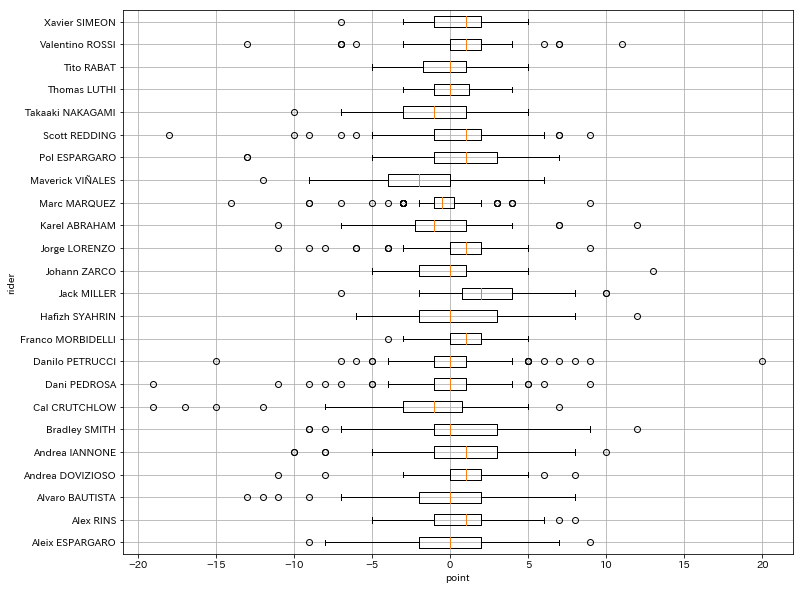

['Aleix ESPARGARO', 'Alex RINS', 'Alvaro BAUTISTA', 'Andrea DOVIZIOSO', 'Andrea IANNONE', 'Bradley SMITH', 'Cal CRUTCHLOW', 'Dani PEDROSA', 'Danilo PETRUCCI', 'Franco MORBIDELLI', 'Hafizh SYAHRIN', 'Jack MILLER', 'Johann ZARCO', 'Jorge LORENZO', 'Karel ABRAHAM', 'Marc MARQUEZ', 'Maverick VIÑALES', 'Pol ESPARGARO', 'Scott REDDING', 'Takaaki NAKAGAMI', 'Thomas LUTHI', 'Tito RABAT', 'Valentino ROSSI', 'Xavier SIMEON']


In [66]:
Y = []
target_label = 'point'
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1][target_label])

fig,ax = plt.subplots(figsize=(12,10))
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel('rider')
plt.grid(True)
plt.show()
print(labels)

In [56]:
temp = merge.groupby('rider').agg('mean').sort_values('point')
temp.index.values

array(['Maverick VIÑALES', 'Cal CRUTCHLOW', 'Takaaki NAKAGAMI',
       'Karel ABRAHAM', 'Marc MARQUEZ', 'Johann ZARCO', 'Dani PEDROSA',
       'Alvaro BAUTISTA', 'Tito RABAT', 'Aleix ESPARGARO', 'Thomas LUTHI',
       'Danilo PETRUCCI', 'Scott REDDING', 'Xavier SIMEON',
       'Bradley SMITH', 'Hafizh SYAHRIN', 'Jorge LORENZO',
       'Pol ESPARGARO', 'Franco MORBIDELLI', 'Andrea IANNONE',
       'Andrea DOVIZIOSO', 'Valentino ROSSI', 'Alex RINS', 'Jack MILLER'],
      dtype=object)

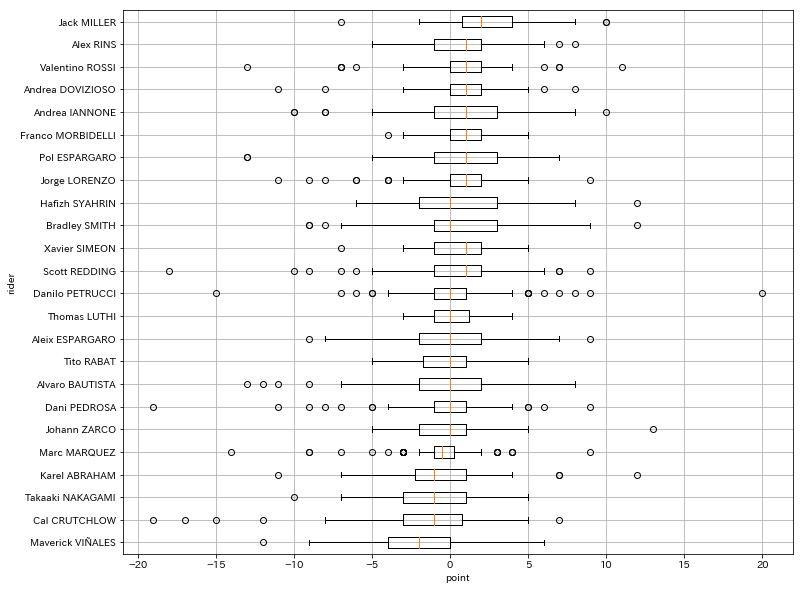

In [70]:
temp = merge.groupby('rider').agg('mean').sort_values('point')
Y = []
target_label = 'point'
labels = []
for rider in temp.index.values:
    labels.append(rider)
    Y.append(grouped.get_group(rider)[target_label])
    
fig,ax = plt.subplots(figsize=(12,10))
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel('rider')
plt.grid(True)
plt.show()